# Assumption 1 - Individual Scatter Plots

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

`np.random.rand(100,1) -> generates an array of shape (100, 1) filled with random floats in the half-open interval [0.0, 1.0), which means the values will be greater than or equal to 0 and less than 1.`

` np.random.randn(100,1) Generate a 100x1 array of random numbers from a standard normal distribution`


In [51]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

In [53]:
df  = pd.DataFrame()
df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y']  = z.reshape(100)
df

,x1,x2,y
0,3.688367,2.723050,24.905482
1,0.990193,1.104015,5.473281
2,2.796475,-2.375023,14.880348
3,4.033870,-2.031577,21.323217
4,0.549247,0.536105,3.725013
...,...,...,...
95,-1.733422,-0.729184,5.080649
96,0.840278,1.140158,3.829161
97,0.975157,4.172282,21.676658
98,-0.562129,2.079263,7.739160


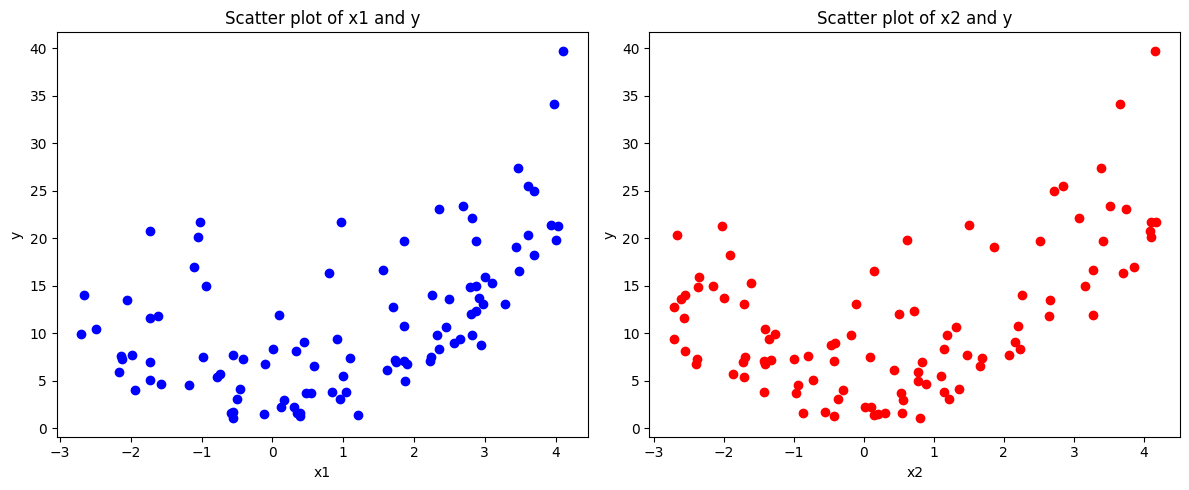

In [59]:
# Create a new figure and define subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# Plot x1 and y
ax1.scatter(df['x1'],df['y'],color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

# `Assumption 1 - Residual Plot`

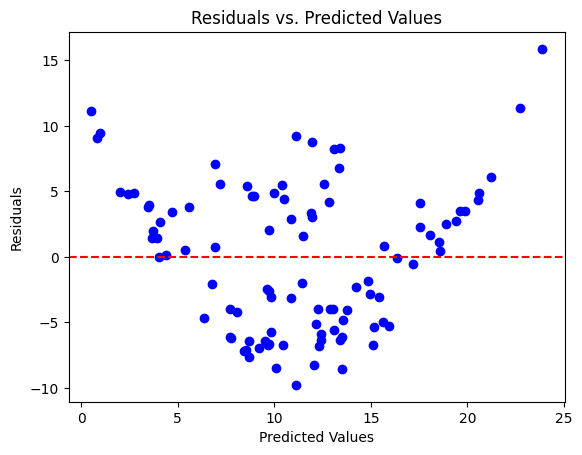

In [64]:
# Fit a linear regression model
x = df[['x1', 'x2']] # input cols
y = df['y'] # output col

model = LinearRegression()
model.fit(x,y)

# Calculate predicted values and residuals
y_pred = model.predict(x)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle ='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()

# `Assumption 1 - Adding Polynomial Term`

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_y_pred = linear_model.predict(x_test)

# Calculate metrics for linear model
linear_r2 = r2_score(y_test,linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
poly_y_pred = poly_model.predict(x_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")

Linear model
R-squared: 0.4775
Mean Squared Error: 28.4714

Polynomial model
R-squared: 0.9823
Mean Squared Error: 0.9635


# Assumption 1 - Applying Transformation

```` np.random.seed(42) ensures you get the same random numbers every time you run the code.this means that every time you run the code with the same seed, you’ll get the same “random” numbers.You can choose any integer as a seed````

``0: This is where the peak of the distribution is (the average value).
5: This tells you how spread out the numbers will be from the average value.``

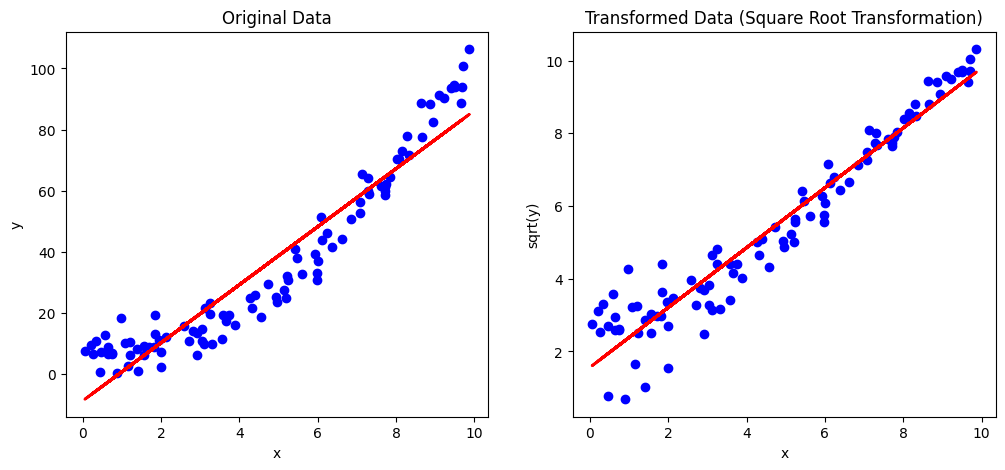

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [86]:
# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100,1)
y = x**2 + 5 + np.random.normal(0, 5, (100,1))
y = np.abs(y) # Ensure y is non -ve


# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x,y)
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt)

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")


### Assumption 1 - Applying Polynomial Regression


The line of code ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2) serves a specific purpose in data visualization, especially in the context of plotting predicted values from a model, such as a polynomial regression. Here are the key reasons why we use this approach:

1. **Visual Clarity
Sorted X-Values:** By sorting the x-values, you create a clear and continuous line in the plot. This helps in visualizing trends or patterns in the data without any abrupt changes in the order of points. If you plot unsorted x-values, the line might look jagged or disconnected.
2.**Correct Correspondence Between X and Y Values Matching Sorted X with Predicted Y**Using np.argsort(x[:, 0]) allows you to rearrange the predicted y-values (y_pred_poly) to correspond correctly with the sorted x-values. This ensures that each y-value is plotted against its respective x-value in the right order, making the visual representation accurate.
3. **Improving the Interpretation of Predictions
Understanding Model Behavior:** When you plot the predicted values as a function of the independent variable, you can easily see how the model behaves across the range of inputs. This can be particularly useful for:
Identifying trends (e.g., increasing, decreasing, or oscillating behavior).
Visualizing the effect of the independent variable on the predicted outcome.
4. **Highlighting the Model Fit
Comparison with Actual Data:** When you plot this line alongside actual data points (if applicable), you can assess how well the model fits the data. A smooth line will help visualize the model's performance and the relationship it captures between the variables.
5. **Enhanced Presentation
Styling Options:** Using parameters like color='red' and linewidth=2 enhances the aesthetics of the plot, making it visually appealing and easier for viewers to focus on important aspects of the data.

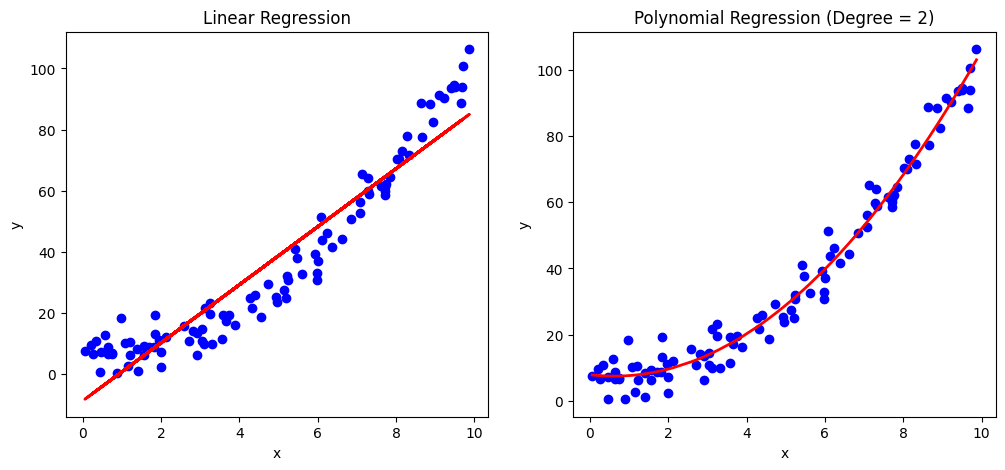

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")

**Explanation**

In [107]:
sorted(x[:,0])

[0.05522117123602399,
 0.20584494295802447,
 0.2541912674409519,
 0.34388521115218396,
 0.45227288910538066,
 0.46450412719997725,
 0.5808361216819946,
 0.6355835028602363,
 0.6505159298527952,
 0.7404465173409036,
 0.7455064367977082,
 0.884925020519195,
 0.9767211400638387,
 1.0789142699330445,
 1.1586905952512971,
 1.195942459383017,
 1.2203823484477883,
 1.3949386065204183,
 1.4092422497476265,
 1.5599452033620265,
 1.5601864044243652,
 1.7052412368729153,
 1.8182496720710062,
 1.8340450985343382,
 1.8485445552552704,
 1.959828624191452,
 1.987156815341724,
 1.9967378215835974,
 2.1233911067827616,
 2.587799816000169,
 2.713490317738959,
 2.8093450968738076,
 2.9122914019804194,
 2.9214464853521815,
 3.0424224295953772,
 3.0461376917337066,
 3.109823217156622,
 3.1171107608941098,
 3.2518332202674705,
 3.2533033076326436,
 3.308980248526492,
 3.567533266935893,
 3.5846572854427263,
 3.663618432936917,
 3.745401188473625,
 3.8867728968948203,
 4.275410183585496,
 4.319450186421157,


In [109]:
np.argsort(x[:, 0])

array([72, 10, 98, 42, 58, 29,  6, 83, 32, 77, 68, 56, 37, 99, 79, 90, 40,
       21, 66,  5,  4, 31, 14, 15, 49, 57, 71, 26, 13, 44, 61, 64, 19, 22,
       16, 36, 84, 46, 85, 59, 82, 63, 78, 23,  0, 60, 97, 18, 39, 24, 89,
       95, 41, 27, 47, 96, 17, 65, 48, 93, 28, 54,  3,  8, 30, 20, 81, 87,
       45, 38, 74,  9, 91, 75, 86,  2, 92, 94, 76, 70, 51, 25, 67, 35, 73,
       62, 12, 80,  7, 88, 53, 43, 55, 52, 33,  1, 34, 50, 11, 69],
      dtype=int64)

In [111]:
x[72]

array([0.05522117])

# Assumption 2 -Histogram & QQ Plot

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100,1)
y = 3 * x + np.random.normal(0,0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred


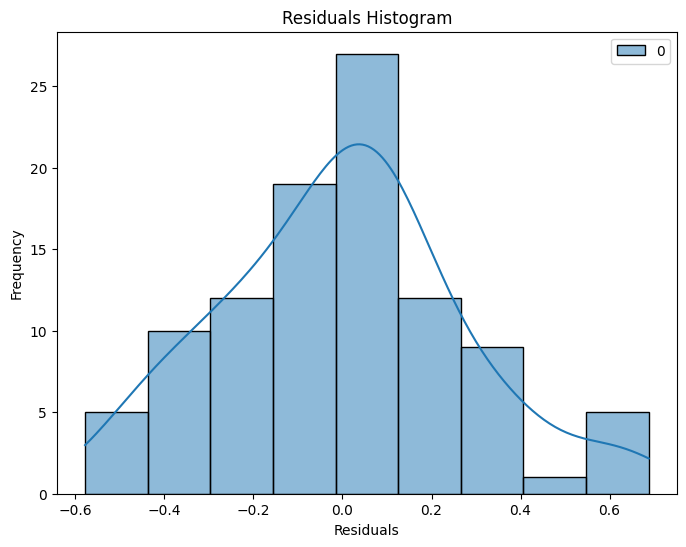

In [126]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

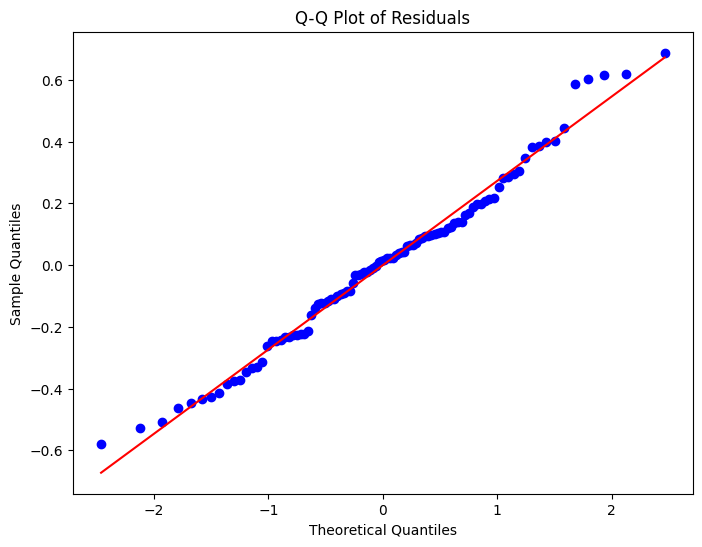

In [128]:
# Q-Q plot
from scipy import stats

plt.figure(figsize=(8,6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [130]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")

Mean of residuals: 0.0000


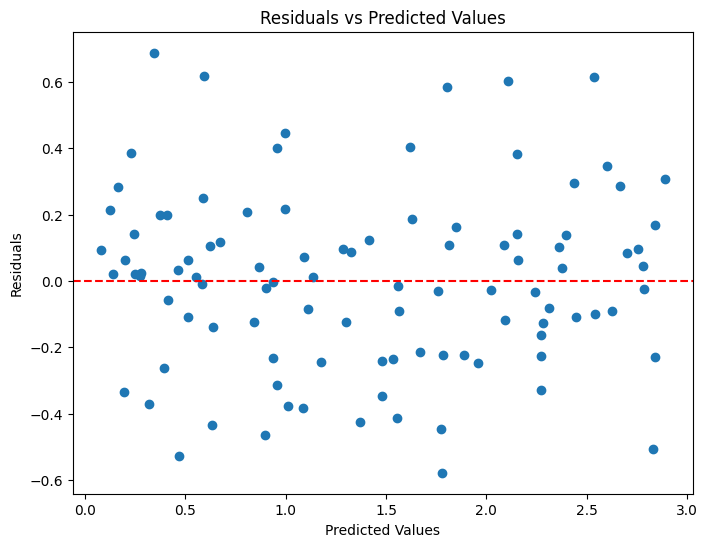

In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

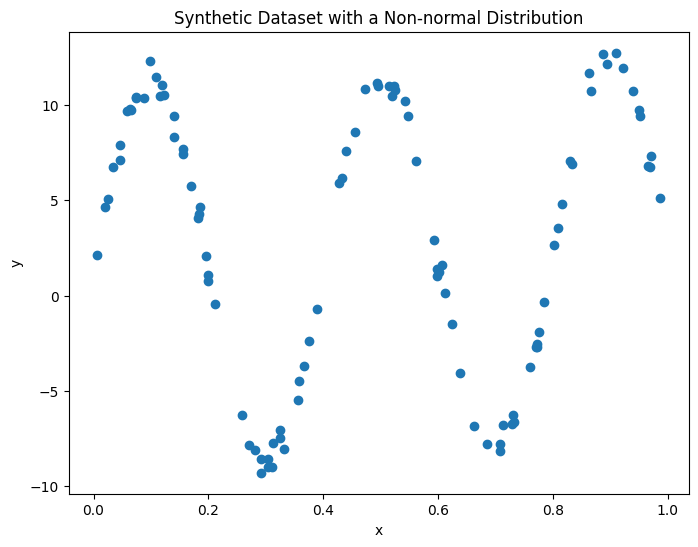

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()


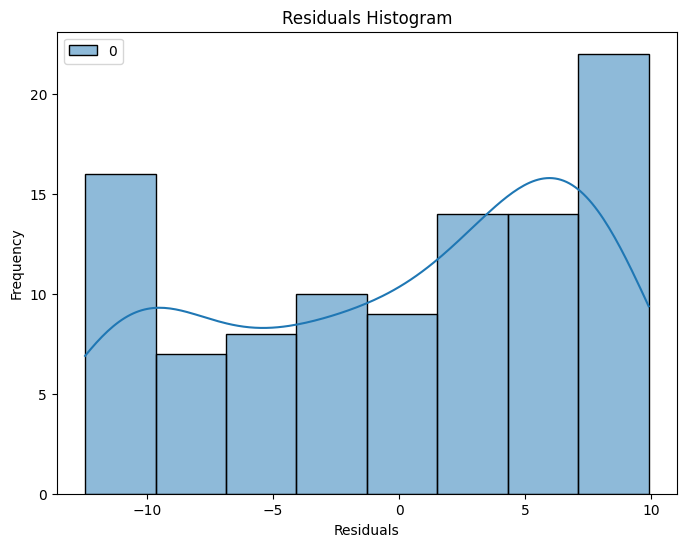

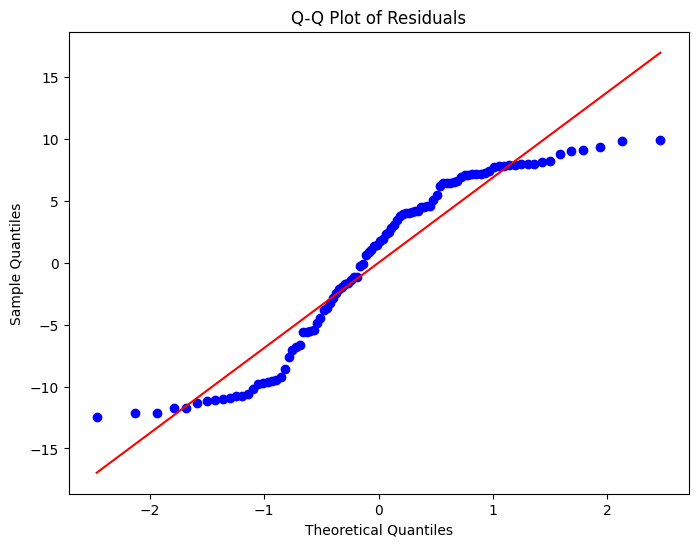

In [136]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [138]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: -0.0000


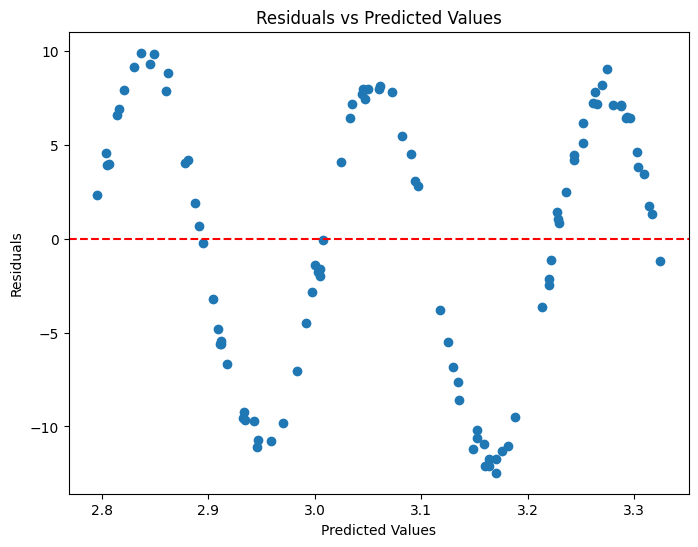

In [140]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 2 -Omnibus Test

In [145]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100,1)
y = 3 * x + np.random.normal(0,0.3,(100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, Kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


`**Interpretation:
The test provides a p-value. If the p-value is low (typically less than 0.05), it suggests that the residuals are not normally distributed.
A high p-value (greater than 0.05) suggests the residuals are normally distributed, meaning the model assumptions hold.
There is no fixed limit for the Omnibus test value itself; instead, it's about the p-value:**`

`**p-value > 0.05: Normality is satisfied.
  p-value < 0.05: Residuals deviate from normality (problematic)**`

In [147]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: -0.3717
Kurtosis: -1.2746
Omnibus test statistic: 50.6234
Omnibus test p-value: 0.0000


# Assumption 3 - Residual Plot

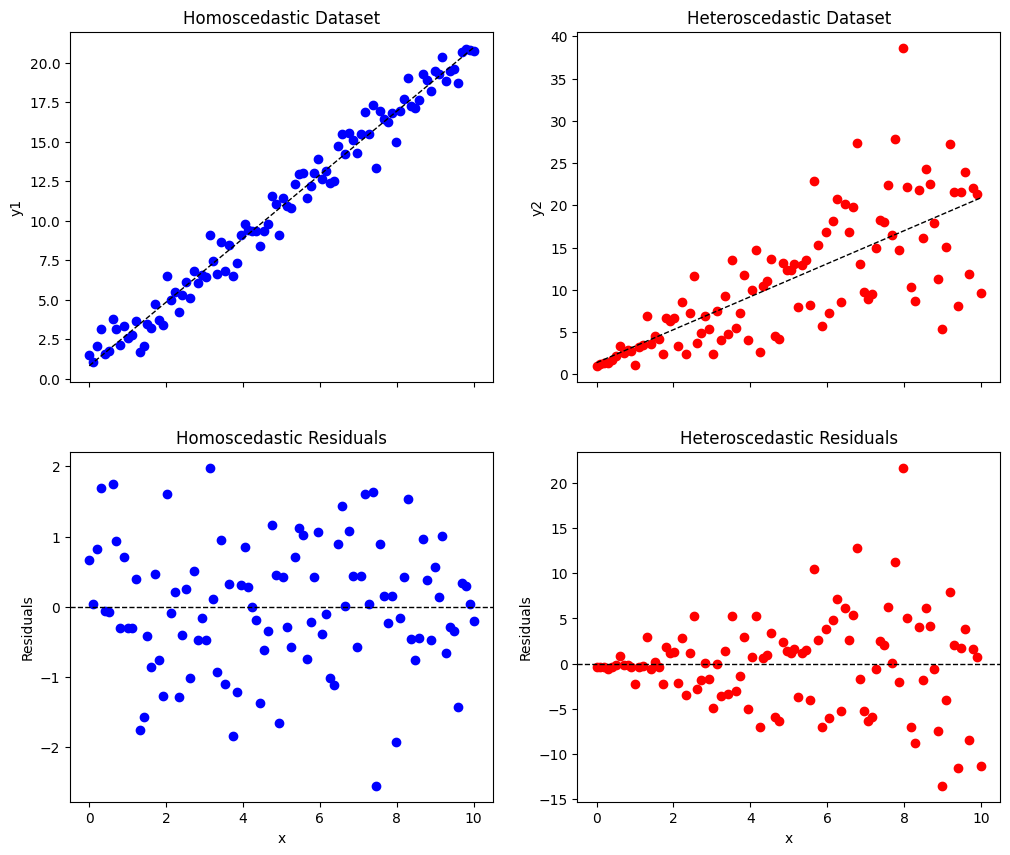

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

# Fit linear models
coeffs1 = np.polyfit(x,y1,1)
y1_pred = np.polyval(coeffs1, x)
residuals1 = y1 - y1_pred

coeffs2 = np.polyfit(x, y2, 1)
y2_pred = np.polyval(coeffs2, x)
residuals2 = y2 - y2_pred

# Plot datasets and residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Plot dataset 1
axes[0, 0].scatter(x, y1, color='blue')
axes[0, 0].plot(x, y1_pred, color='black', linestyle='--', lw=1)
axes[0, 0].set_title('Homoscedastic Dataset')
axes[0, 0].set_ylabel('y1')

# Plot dataset 2
axes[0, 1].scatter(x, y2, color='red')
axes[0, 1].plot(x, y2_pred, color='black', linestyle='--', lw=1)
axes[0, 1].set_title('Heteroscedastic Dataset')
axes[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
axes[1, 0].scatter(x, residuals1, color='blue')
axes[1, 0].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 0].set_title('Homoscedastic Residuals')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1, 1].scatter(x, residuals2, color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 1].set_title('Heteroscedastic Residuals')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Residuals')

plt.show()


# Assumption 3 - Breusch-Pagan Test

**```
The Breusch-Pagan test checks for heteroscedasticity, which means it tests if the variance of residuals in a regression model is constant (homoscedasticity) or if it changes at different levels of the independent variables (heteroscedasticity).```**

**Interpretation:**
*``The test gives a p-value.
p-value > 0.05: The residuals have constant variance (no heteroscedasticity, assumption is satisfied).
p-value < 0.05: There is heteroscedasticity, meaning the variance of residuals is not constant (problematic).
Key Point:
The focus is on the p-value. A p-value below 0.05 suggests the presence of heteroscedasticity, meaning the assumption of homoscedasticity is violated.```*

In [165]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit linear models
x_with_constant1 = sm.add_constant(x)
model1 = sm.OLS(y1, x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
model2 = sm.OLS(y2, x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model1.resid, x_with_constant1)
bp_test2 = het_breuschpagan(model2.resid, x_with_constant2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")

Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 0.2728976751264822
LM-Test p-value: 0.6013945776291549
F-Statistic: 0.26817155556443734
F-Test p-value: 0.6057280388642222

Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 13.074070036062679
LM-Test p-value: 0.0002994118347711723
F-Statistic: 14.739662423694455
F-Test p-value: 0.00021882735433543667


# Assumption 3 - WLS

# **scaler.fit_transform():**

``This is a method from StandardScaler (or another scaler) that:``
`fit(): Calculates the mean and standard deviation of x.`
`transform(): Uses these values to standardize the data (scaling it to have a mean of 0 and standard deviation of 1).
fit_transform() is a convenient method that combines both steps in one.
x.reshape(-1, 1):`

`This reshapes x into a 2D array with one column and as many rows as needed (from the original data).`
`The -1 automatically adjusts the number of rows based on the size of x. The 1 specifies that there is one column.`
`This reshaping is necessary because StandardScaler expects a 2D array (with features in columns) as input.`


OLS Model Summary
------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.17
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.55e-08
Time:                        17:06:56   Log-Likelihood:                -363.82
No. Observations:                 100   AIC:                             731.6
Df Residuals:                      98   BIC:                             736.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1

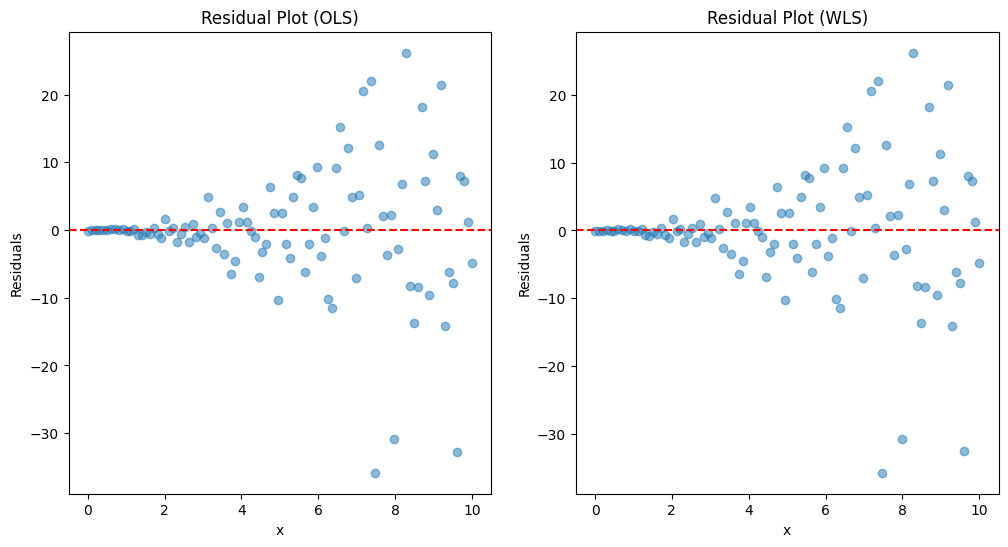

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Scale the independent variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

# Add a constant term to the scaled independent variable
x_scaled_with_constant = sm.add_constant(x_scaled)

# Fit an OLS model
model_ols = sm.OLS(y, x_scaled_with_constant).fit()

# Calculate the squared residuals
squared_residuals = model_ols.resid**2

# Use the squared residuals with a small constant added as the weights for WLS
weights = 1 / (squared_residuals + 1e-6)

# Fit a WLS model using the estimated weights
model_wls = sm.WLS(y, x_scaled_with_constant, weights=weights).fit()

# Print the model summaries
print("OLS Model Summary")
print("------------------")
print(model_ols.summary())
print("\nWLS Model Summary")
print("------------------")
print(model_wls.summary())

# Plot the residual plots for OLS and WLS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, model_ols.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (OLS)')

plt.subplot(1, 2, 2)
plt.scatter(x, model_wls.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (WLS)')

plt.show()


**Confidence Interval:**

The shaded area around the regression line represents the confidence interval for the predictions.
This interval provides an estimate of the uncertainty around the regression line; wider areas indicate more uncertainty in predictions.
What It Represents:
The plot is often used in data analysis to illustrate the relationship between the independent variable and the dependent variable.
The regression line indicates the trend in the data, helping to understand how changes in the independent variable may affect the dependent variable.
The confidence interval shows the reliability of the predictions made by the regression model.

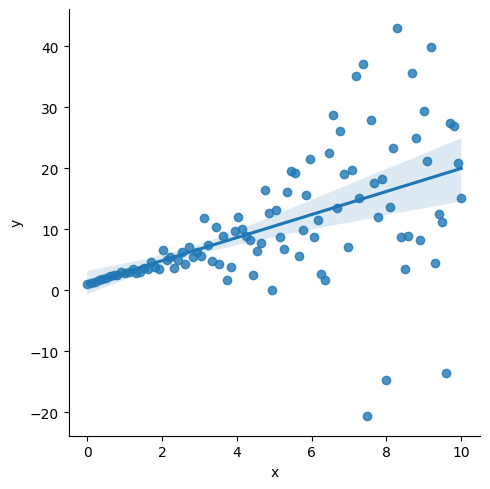

In [167]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Create a DataFrame with the generated data
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# Plot the lmplot with confidence intervals
sns.lmplot(x='x', y='y', data=df, ci=95)
plt.show()